# Miniproyecto 1: Índice NDI

El primer proyecto será calcular el índice de diferencia normalizado (NDI) que se puede utilizar como indicador de la salud de las plantas. Como imagen de entrada utilizaremos un mosaico de la ESCOM generado con vuelos aéreos. El objetivo de esta práctica es aplicar las operaciones básicas que hemos visto y que seamos capaces de mantener los valores de los pixeles en un rango de cuantización adecuado o que selecciones el tipo de dato necesario.

De acuerdo con [1], el NDI se calcula: 
 
\begin{equation}
 NDI = \frac{G - R}{G + R}
\end{equation} donde $G$ y $R$ indican los canales verde y rojo respectivamente.
 
Nota, en el artículo de Meyer[1] la división está al revés, al parecer es un error del artículo.

Adicionalmente, puedes intentar calcular un indice más elaborado como es el MGRVI o el RGBVI [2].

### Referencias

[1] Meyer, George E., and João Camargo Neto. Verification of color vegetation indices for automated crop imaging applications. Computers and electronics in agriculture 63.2 (2008): 282-293

[2] Bendig, Juliane, et al. Combining UAV-based plant height from crop surface models, visible, and near infrared vegetation indices for biomass monitoring in barley. International Journal of Applied Earth Observation and Geoinformation 39 (2015): 79-87.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

%matplotlib inline

('Esta imagen es de tipo:', dtype('uint8'), 'con dimensiones:', (1044L, 1155L, 3L))


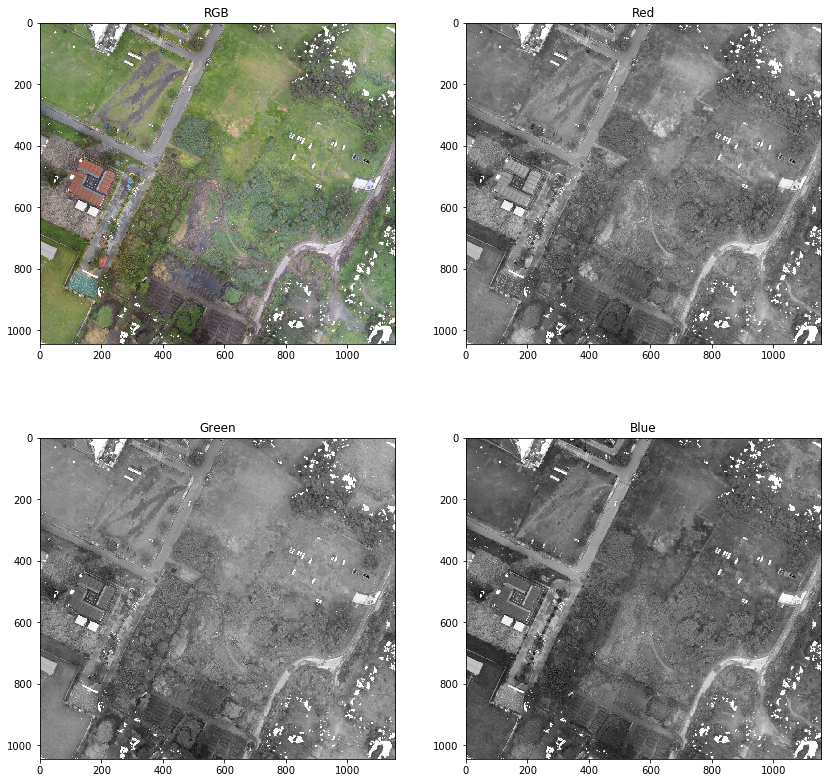

In [2]:
# Leer la imagen 
image = cv2.imread('ESCOM2_small.jpg')
print('Esta imagen es de tipo:', image.dtype, 'con dimensiones:', image.shape)

# Obtener los tres canales de la imagen
b,g,r = cv2.split(image)

# Mostrar los canales
plt.figure(figsize=(14, 14))

plt.subplot(2,2,1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('RGB')

plt.subplot(2,2,2)
plt.imshow(r, cmap='gray')
plt.title('Red')

plt.subplot(2,2,3)
plt.imshow(g, cmap='gray')
plt.title('Green')

plt.subplot(2,2,4)
plt.imshow(b, cmap='gray')
plt.title('Blue')
plt.show()

Es importante notar cual es el rango que tienen los valores de gris. Como ejemplo desplegaremos el canal rojo.

In [4]:
print(r)

print('\n El valor máximo en la imagen es:')
print(np.amax(r))
print('\n y valor minimo es:')
print(np.amin(r))

[[177 155 127 ... 141 137 133]
 [118 110 103 ... 139 135 131]
 [110 106 104 ... 144 140 134]
 ...
 [255 255 252 ... 123 120 119]
 [238 248 255 ... 124 121 120]
 [151 178 180 ... 125 122 120]]

 El valor máximo en la imagen es:
255

 y valor minimo es:
0


 Como puedes observar los valores son número enteros que tienen como máximo el 255. Asi que la imagen final deberá de estar en ese rango para ser visualizada.
 

[[0.73913044 0.83950615 1.0148149  ... 0.92258066 0.9470199  0.9727891 ]
 [1.0787401  1.1512605  1.2321428  ... 0.9346405  0.9597315  0.9862069 ]
 [1.1475409  1.1864407  1.2068965  ... 0.8993711  0.92258066 0.9597315 ]
 ...
 [0.5019763  0.503937   0.50988144 ... 1.048387   1.0661157  1.0833334 ]
 [0.527897   0.5102041  0.503937   ... 1.032      1.0655738  1.0661157 ]
 [0.8472222  0.7109827  0.7078652  ... 1.031746   1.0487804  1.0661157 ]]
float32


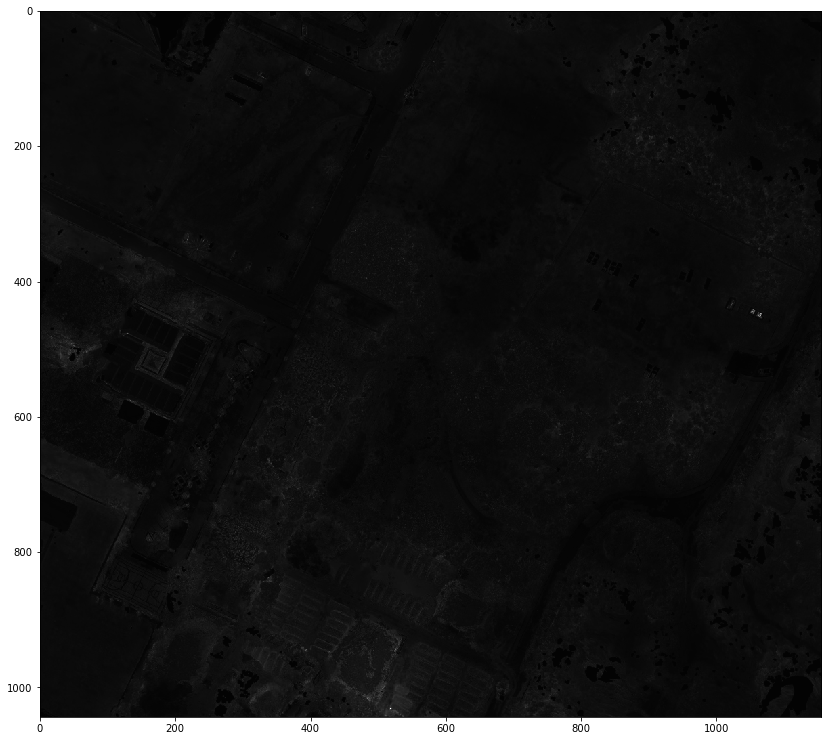

In [35]:
# TODO: Insertar el código para calcular el índice NDI

# Debes de tomar en cuenta que debes permanecer en el rango adecuado. Una función útil es cv2.addWeighted().
# La suma y la resta se pueden trabajar en enteros, sin embargo, la división es preferible mantenerla en flotante
# puedes usar la función imagen.astype('float32') para convertir a flotante
#------------------------------------------------------------------------
max_integer = 128
nuevo_g = (0.5 * g).astype('uint8')
nuevo_g = nuevo_g + (max_integer * np.ones(nuevo_g.shape)).astype('uint8')

nuevo_r = (0.5*r).astype('uint8')

resta = nuevo_g - nuevo_r

suma = (0.5 * g).astype('uint8') + (0.5 * r).astype('uint8')

suma[(suma ==0)] = 1

# asignar el NDI
NDI = np.divide(resta.astype('float32'), suma.astype('float32'))

print(NDI)
print(NDI.dtype)
plt.figure(figsize=(14, 14))
plt.imshow(NDI, cmap = 'gray')


In [ ]:
plt.imshow(NDI, cmap='gray')
plt.show()

Si todo funcionó debes visualizar las imagenes de la siguiente forma:

suma = ![suma](suma.png)
resta = ![resta](resta.png)
NDI = ![ndi](ndi.png)

Como podras ver el índice no es muy claro, esto se debe a la división la cual no es lineal. Asi que haremos un umbralizado, por ahora no es importante como se hace el umbralizado, solo es importante que observes el cambio visual y encuentres una correspondencia entre las áreas verdes y las áreas resaltadas despúes del umbralizado.


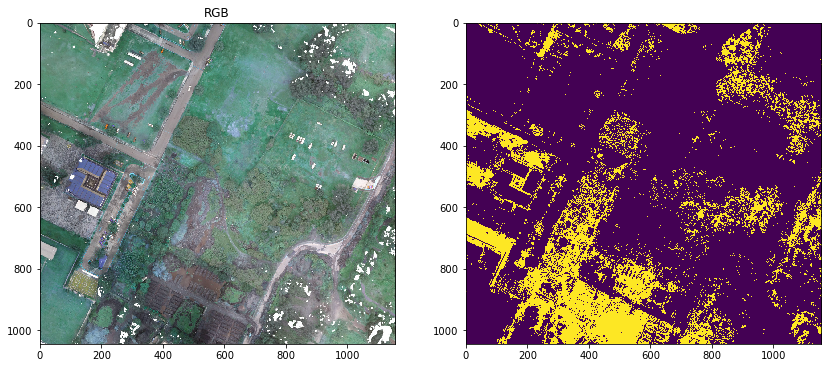

In [39]:
# Para visualizar el índice umbralizaremos la imagen
# utilizaremos una técnica llamada umbralización de Otsu. 
# Por el momento no entraremos en detalle en ella y solo desplegaremos el resultado

# convertir a enteros para usar Otsu
NDI_scaled = NDI.copy()
NDI_scaled = NDI_scaled - NDI.min()
NDI_scaled = NDI_scaled * (255/NDI.max())
NDI_int = NDI_scaled.astype('uint8')

# Thresholding
umbral = 0.7
ret2,th1 =  cv2.threshold(NDI_int, umbral, 255.0, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Comparación
plt.figure(figsize=(14, 14))

plt.subplot(2,2,1)
plt.imshow(image)
plt.title('RGB')

plt.subplot(2,2,2)
plt.imshow(th1)


Finalmente si todo funcionó debes visualizar algo como lo siguiente:

![comparacion](comparacion.png)

Ve más allá. ¿Puedes obtener los resultados del paper[2]?

